In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
import unidecode
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

## Data preparation

In [88]:
df = pd.read_csv('input/house_prices.csv')

In [3]:
df.head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
0,495000,planta 1,exterior,3,118.0,True,True,Chopera,Arganzuela
1,485000,planta 2,exterior,2,82.0,True,True,Palos de Moguer,Arganzuela
2,315000,planta 2,exterior,2,72.0,False,False,Legazpi,Arganzuela
3,585000,planta 4,exterior,2,174.0,True,True,Palos de Moguer,Arganzuela
4,255000,bajo,exterior,3,75.0,False,False,Acacias,Arganzuela


In [4]:
df.shape

(15975, 9)

In [5]:
df.duplicated().sum()

1717

In [6]:
df = df.drop_duplicates()
df.shape

(14258, 9)

In [7]:
df.dtypes

price             int64
house_type       object
house_type_2     object
rooms             int64
m2              float64
elevator           bool
garage             bool
neighborhood     object
district         object
dtype: object

In [8]:
columns_object = list(df.dtypes[df.dtypes == 'object'].index)

In [9]:
for col in columns_object:
    df[col] = df[col].astype('category')

In [10]:
df.dtypes

price              int64
house_type      category
house_type_2    category
rooms              int64
m2               float64
elevator            bool
garage              bool
neighborhood    category
district        category
dtype: object

#### Normalizing category variables

In [11]:
columns_category = list(df.dtypes[df.dtypes == 'category'].index)

In [12]:
for idx in columns_category:
    df[idx] = (df[idx].apply(lambda x: unidecode.unidecode(x))
               .str.lower()
               .str.replace(" ", "_"))

#### Grouping neighborhood column

In [13]:
df.nunique()

price           2001
house_type        26
house_type_2       2
rooms             18
m2               585
elevator           2
garage             2
neighborhood     341
district          21
dtype: int64

In [14]:
df.neighborhood = (df.neighborhood.str.replace("chalet_en_", "")
                                    .str.replace("chalet_pareado_en_", "")
                                    .str.replace("chalet_adosado_en_", "")
                                    .str.replace("duplex_en_", "")
                                    .str.replace("atico_en_", "")
                                    .str.replace("casa_o_chalet_independiente_en_", ""))

In [15]:
df.nunique()

price           2001
house_type        26
house_type_2       2
rooms             18
m2               585
elevator           2
garage             2
neighborhood     136
district          21
dtype: int64

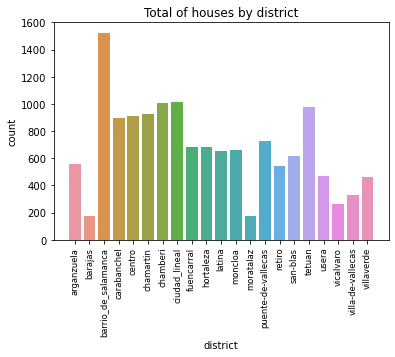

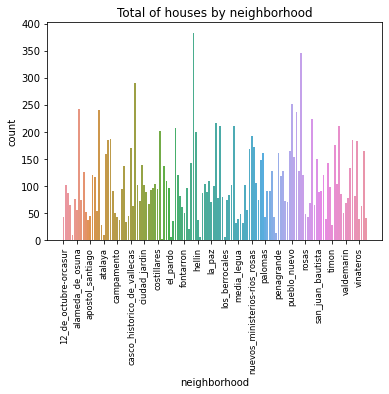

In [16]:
for idx in ["district", "neighborhood"]:
    df_plot = df.copy()
    
    df_plot = (df.groupby(idx)[idx].count()
                                    .to_frame()
                                    .rename(columns={idx: "count"})
                                    .reset_index())
    sns.barplot(x=df_plot[idx], y=df_plot["count"])
    plt.title(f"Total of houses by {idx}")
    plt.tick_params(axis='x', labelsize="small", labelrotation=90)
    plt.locator_params(axis='x', nbins=25)
    plt.show()

#### Data cleaning

In [17]:
df.describe().round()

,price,rooms,m2
count,14258.0,14258.0,14258.0
mean,615402.0,3.0,124.0
std,780215.0,1.0,103.0
min,725.0,1.0,1.0
25%,195000.0,2.0,66.0
50%,350000.0,3.0,92.0
75%,710750.0,3.0,140.0
max,13950000.0,41.0,989.0


In [18]:
df[df['price'] == 725]

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
10002,725,planta_3,exterior,1,60.0,True,False,los_carmenes,latina


In [19]:
df.drop(10002, axis=0, inplace=True)

In [20]:
df.price.min()

47500

In [21]:
df[df['price'] == 47500]

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
11951,47500,bajo,exterior,1,24.0,False,False,palomeras_bajas,puente-de-vallecas


In [22]:
df.describe().round()

,price,rooms,m2
count,14257.0,14257.0,14257.0
mean,615445.0,3.0,124.0
std,780225.0,1.0,103.0
min,47500.0,1.0,1.0
25%,195000.0,2.0,66.0
50%,350000.0,3.0,92.0
75%,711000.0,3.0,140.0
max,13950000.0,41.0,989.0


In [23]:
df[df['price'] == 13950000]

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
5827,13950000,chalet,exterior,6,1.116,False,True,el_viso,chamartin


In [24]:
df[df['rooms'] == 41]

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
779,4999999,bajo,exterior,41,1.76,True,True,timon,barajas


In [25]:
df.drop(779, axis=0, inplace=True)

In [26]:
df.describe().round()

,price,rooms,m2
count,14256.0,14256.0,14256.0
mean,615137.0,3.0,124.0
std,779388.0,1.0,103.0
min,47500.0,1.0,1.0
25%,195000.0,2.0,66.0
50%,350000.0,3.0,92.0
75%,710250.0,3.0,140.0
max,13950000.0,17.0,989.0


In [27]:
df[df['rooms'] == 17]

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
4053,2500000,planta_3,exterior,17,400.0,False,False,sol,centro


Error capturing the m2 because the "."

In [28]:
df.sort_values(by="m2").head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
10660,3200000,casa,exterior,6,1.000,False,True,aravaca,moncloa
8780,2750000,chalet,exterior,7,1.000,False,True,fuentelarreina,fuencarral
8444,4900000,casa,exterior,9,1.000,False,True,fuentelarreina,fuencarral
10497,3200000,chalet,exterior,6,1.000,False,True,aravaca,moncloa
9468,3900000,chalet,exterior,7,1.016,False,True,conde_orgaz-piovera,hortaleza


In [29]:
df.m2[df['m2'] < 10] = df.m2[df['m2'] < 10] * 1000

In [30]:
df.sort_values(by="m2").head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
4449,185000,planta_3,NaN,1,20.0,False,False,chueca-justicia,centro
4055,149900,planta_4,interior,1,20.0,True,False,malasana-universidad,centro
4354,75000,bajo,interior,1,20.0,False,False,lavapies-embajadores,centro
11487,86000,planta_2,exterior,1,20.0,False,False,san_diego,puente-de-vallecas
4430,98000,planta_1,interior,1,20.0,False,False,lavapies-embajadores,centro


In [31]:
df[df['m2'] == 2400]

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
10389,3500000,chalet,exterior,10,2400.0,False,True,el_plantio,moncloa
10682,3500000,chalet,exterior,11,2400.0,False,False,el_plantio,moncloa


## Exploratory Data Analysis

In [32]:
df.head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
0,495000,planta_1,exterior,3,118.0,True,True,chopera,arganzuela
1,485000,planta_2,exterior,2,82.0,True,True,palos_de_moguer,arganzuela
2,315000,planta_2,exterior,2,72.0,False,False,legazpi,arganzuela
3,585000,planta_4,exterior,2,174.0,True,True,palos_de_moguer,arganzuela
4,255000,bajo,exterior,3,75.0,False,False,acacias,arganzuela


In [33]:
df.shape

(14256, 9)

In [34]:
df.isnull().sum()

price             0
house_type        0
house_type_2    463
rooms             0
m2                0
elevator          0
garage            0
neighborhood      0
district          0
dtype: int64

In [35]:
df.house_type_2 = df.house_type_2.fillna("unknow")

In [36]:
df.isnull().any()

price           False
house_type      False
house_type_2    False
rooms           False
m2              False
elevator        False
garage          False
neighborhood    False
district        False
dtype: bool

#### Centran tendency measures

In [37]:
for col in ['price', 'rooms', 'm2']:
    print(f'{col:>8} -> mean: {round(df[col].mean(),1):>8}, median: {df[col].median():>8}, mode: {df[col].mode()[0]:>8}')

   price -> mean: 615137.4, median: 350000.0, mode:   165000
   rooms -> mean:      2.8, median:      3.0, mode:        3
      m2 -> mean:    127.8, median:     92.0, mode:     60.0


#### Price distribution

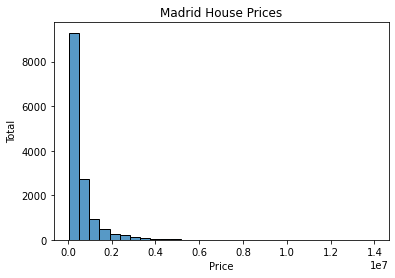

In [38]:
sns.histplot(df.price, bins=30)
plt.title('Madrid House Prices')
plt.ylabel("Total")
plt.xlabel("Price")
plt.show()

As the distribution is a long tail, I will apply a log transformation to see the distribution

In [39]:
log_price = np.log1p(df.price)

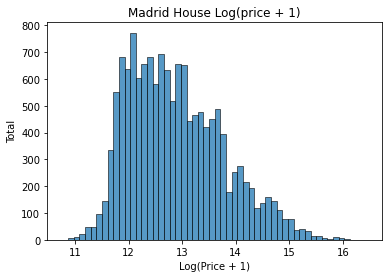

In [40]:
sns.histplot(log_price)
plt.title('Madrid House Log(price + 1)')
plt.ylabel("Total")
plt.xlabel("Log(Price + 1)")
plt.show()


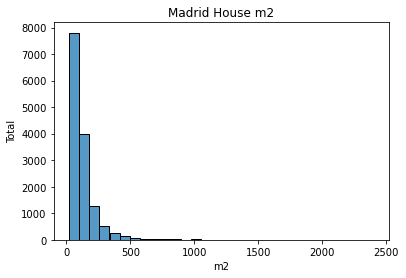

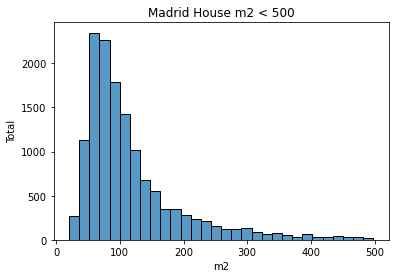

In [41]:
sns.histplot(df.m2, bins=30)
plt.title('Madrid House m2')
plt.ylabel("Total")
plt.xlabel("m2")
plt.show()
print()
sns.histplot(df.m2[df.m2 < 500], bins=30)
plt.title('Madrid House m2 < 500')
plt.ylabel("Total")
plt.xlabel("m2")
plt.show()

In [42]:
df.head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
0,495000,planta_1,exterior,3,118.0,True,True,chopera,arganzuela
1,485000,planta_2,exterior,2,82.0,True,True,palos_de_moguer,arganzuela
2,315000,planta_2,exterior,2,72.0,False,False,legazpi,arganzuela
3,585000,planta_4,exterior,2,174.0,True,True,palos_de_moguer,arganzuela
4,255000,bajo,exterior,3,75.0,False,False,acacias,arganzuela


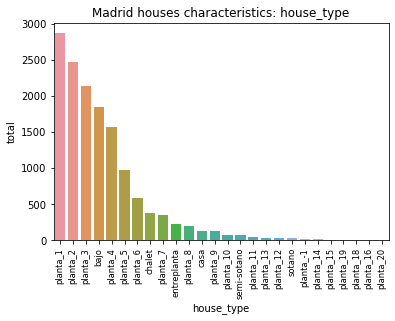

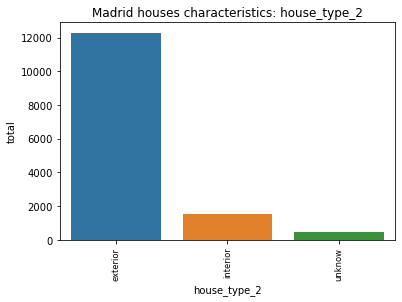

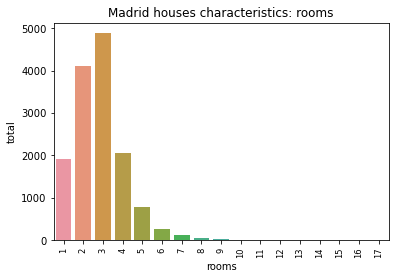

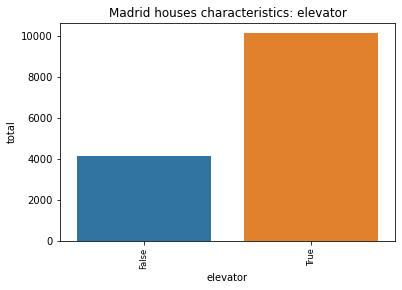

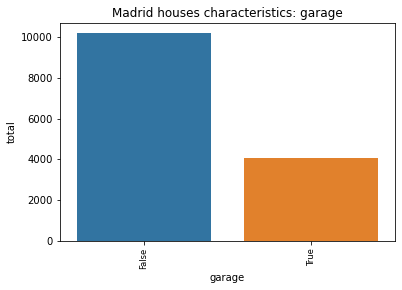

In [43]:
for idx in ["house_type", "house_type_2", "rooms", "elevator", "garage"]:
    df_fig = df[idx].value_counts().to_frame().reset_index().rename(columns=({idx:"total","index":idx}))
    sns.barplot(x=df_fig[idx], y=df_fig["total"])
    plt.title(f'Madrid houses characteristics: {idx}')
    plt.tick_params(axis='x', labelsize="small", labelrotation=90)
    plt.show()
    print()
    print()

#### Feature importance

In [44]:
categorical = list(df.columns)
categorical.remove("price")
categorical.remove("m2")
numerical = ["m2"]

In [45]:
from sklearn.metrics import mutual_info_score

In [46]:
def calculate_mi(series):
    return mutual_info_score(series, np.log1p(df.price))

In [47]:
df_mi = df[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name="mi_price")

Higher values of mutual information mean a higher degree of dependence

In [48]:
df_mi

,mi_price
neighborhood,2.230669
district,1.078787
house_type,0.680991
rooms,0.523873
elevator,0.219474
garage,0.171235
house_type_2,0.109986


Correlation coefficient tells us the strength of the correleation, the "m2" variable has strong correlation with the price

In [49]:
df[numerical].corrwith(np.log1p(df.price)).to_frame(name="cs_price")

,cs_price
m2,0.718595


In [50]:
df_m2_price = df.copy()
df_m2_price["m2_price"] = (df_m2_price.price / df_m2_price.m2)
df_m2_price.head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district,m2_price
0,495000,planta_1,exterior,3,118.0,True,True,chopera,arganzuela,4194.915254
1,485000,planta_2,exterior,2,82.0,True,True,palos_de_moguer,arganzuela,5914.634146
2,315000,planta_2,exterior,2,72.0,False,False,legazpi,arganzuela,4375.000000
3,585000,planta_4,exterior,2,174.0,True,True,palos_de_moguer,arganzuela,3362.068966
4,255000,bajo,exterior,3,75.0,False,False,acacias,arganzuela,3400.000000


In [51]:
df_m2_price[["district", "m2_price"]].groupby("district").mean().reset_index().sort_values(by="m2_price", ascending=False)

,district,m2_price
2,barrio_de_salamanca,7276.891613
6,chamberi,6185.321283
5,chamartin,5887.423168
14,retiro,5704.871460
4,centro,5484.402420
11,moncloa,4658.780550
0,arganzuela,4442.613006
16,tetuan,4150.992369
9,hortaleza,4010.189655
8,fuencarral,3844.808720


In [52]:
df_m2_price[["neighborhood", "m2_price"]].groupby("neighborhood").mean().reset_index().sort_values(by="m2_price", ascending=False).head(10)

,neighborhood,m2_price
106,recoletos,9474.764106
32,castellana,8211.035878
65,jeronimos,8174.532960
7,almagro,7364.555497
50,el_viso,7220.556446
58,goya,6759.431281
70,lista,6740.465789
35,chueca-justicia,6512.833216
83,nueva_espana,6412.328316
63,ibiza,6271.591034


In [53]:
df_m2_price[["neighborhood", "m2_price"]].groupby("neighborhood").mean().reset_index().sort_values(by="m2_price").head(10)

,neighborhood,m2_price
110,san_cristobal,1651.741373
52,entrevias,1841.672343
131,villaverde_alto,1927.638240
74,los_rosales,1932.742107
4,aeropuerto,1941.172897
87,orcasitas,2027.321330
135,zofio,2051.351515
71,los_angeles,2059.425436
72,los_berrocales,2080.342938
11,amposta,2106.664043


In [54]:
df.elevator = df.elevator.astype('str')
df.elevator = df.elevator.str.replace("True", "yes").str.replace("False","no")

In [55]:
df.garage = df.garage.astype('str')
df.garage = df.garage.str.replace("True", "yes").str.replace("False","no")

In [56]:
df.rooms = df.rooms.astype("str")

In [57]:
df.head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
0,495000,planta_1,exterior,3,118.0,yes,yes,chopera,arganzuela
1,485000,planta_2,exterior,2,82.0,yes,yes,palos_de_moguer,arganzuela
2,315000,planta_2,exterior,2,72.0,no,no,legazpi,arganzuela
3,585000,planta_4,exterior,2,174.0,yes,yes,palos_de_moguer,arganzuela
4,255000,bajo,exterior,3,75.0,no,no,acacias,arganzuela


In [58]:
df.dtypes

price             int64
house_type       object
house_type_2     object
rooms            object
m2              float64
elevator         object
garage           object
neighborhood     object
district         object
dtype: object

In [59]:
df.to_csv('output/preprocessed_house_prices.csv', index=False)

## Data Preparation

In [60]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=31)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=31)

In [61]:
print(len(df_train), len(df_val), len(df_test))

8553 2851 2852


In [62]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [63]:
y_full_train = np.log1p(df_full_train.price)
y_train = np.log1p(df_train.price)
y_val = np.log1p(df_val.price)
y_test = np.log1p(df_test.price)

In [64]:
del df_full_train["price"]
del df_train["price"]
del df_val["price"]
del df_test["price"]

In [65]:
dict_full_train = df_full_train.to_dict(orient="records")
dict_train = df_train.to_dict(orient="records")
dict_val = df_val.to_dict(orient="records")
dict_test = df_test.to_dict(orient="records")

In [66]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_full_train)
X_train = dv.transform(dict_train)
X_val = dv.transform(dict_val)
X_test = dv.transform(dict_test)

In [67]:
df.head()

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
0,495000,planta_1,exterior,3,118.0,yes,yes,chopera,arganzuela
1,485000,planta_2,exterior,2,82.0,yes,yes,palos_de_moguer,arganzuela
2,315000,planta_2,exterior,2,72.0,no,no,legazpi,arganzuela
3,585000,planta_4,exterior,2,174.0,yes,yes,palos_de_moguer,arganzuela
4,255000,bajo,exterior,3,75.0,no,no,acacias,arganzuela


## Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

In [69]:
model_regression = LinearRegression()

In [70]:
model_regression.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = model_regression.predict(X_val)

In [72]:
mean_squared_error(y_val, y_pred, squared=False)

0.28770034460942023

## Ridge Regression

In [73]:
for alpha in [0.001, 0.01, 0.5, 1, 3, 5, 10]:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)
    y_pred = model_ridge.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    print(f'alpha:{alpha:>6}, rmse:{rmse:.5f}')
    
    

alpha: 0.001, rmse:0.28770
alpha:  0.01, rmse:0.28767
alpha:   0.5, rmse:0.28682
alpha:     1, rmse:0.28647
alpha:     3, rmse:0.28618
alpha:     5, rmse:0.28639
alpha:    10, rmse:0.28756


In [74]:
model_ridge = Ridge(alpha=3)
model_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

0.28618138605753185

## Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rmses = []
for i in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=i, random_state=31)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    rmses.append(rmse)
    print(f'i: {i:>6}, rmse: {rmse:.5f}')

i:     10, rmse: 0.23410
i:     20, rmse: 0.22990
i:     30, rmse: 0.22752
i:     40, rmse: 0.22774
i:     50, rmse: 0.22764
i:     60, rmse: 0.22752
i:     70, rmse: 0.22694
i:     80, rmse: 0.22659
i:     90, rmse: 0.22627
i:    100, rmse: 0.22634
i:    110, rmse: 0.22643
i:    120, rmse: 0.22667
i:    130, rmse: 0.22655
i:    140, rmse: 0.22637
i:    150, rmse: 0.22620
i:    160, rmse: 0.22620
i:    170, rmse: 0.22631
i:    180, rmse: 0.22614
i:    190, rmse: 0.22620
i:    200, rmse: 0.22614


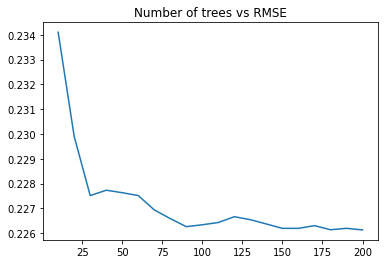

In [77]:
plt.plot(range(10, 201, 10), rmses)
plt.title("Number of trees vs RMSE")
plt.show()

In [78]:
all_rmses = {}

for depth in [20, 25, 30, 35]:
    print(f'depth: {depth}')
    rmses = []
    for i in range (10, 201, 10):
        rf = RandomForestRegressor(n_estimators=i, max_depth=depth, random_state=31)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        rmses.append(rmse)
        print(f'i: {i:>6}, rmse: {rmse:.5f}')
        
    all_rmses[depth] = rmses
    print()
    

depth: 20
i:     10, rmse: 0.24025
i:     20, rmse: 0.23585
i:     30, rmse: 0.23284
i:     40, rmse: 0.23268
i:     50, rmse: 0.23277
i:     60, rmse: 0.23242
i:     70, rmse: 0.23198
i:     80, rmse: 0.23170
i:     90, rmse: 0.23153
i:    100, rmse: 0.23143
i:    110, rmse: 0.23158
i:    120, rmse: 0.23167
i:    130, rmse: 0.23153
i:    140, rmse: 0.23129
i:    150, rmse: 0.23109
i:    160, rmse: 0.23120
i:    170, rmse: 0.23129
i:    180, rmse: 0.23119
i:    190, rmse: 0.23115
i:    200, rmse: 0.23103

depth: 25
i:     10, rmse: 0.23526
i:     20, rmse: 0.23071
i:     30, rmse: 0.22837
i:     40, rmse: 0.22863
i:     50, rmse: 0.22879
i:     60, rmse: 0.22868
i:     70, rmse: 0.22809
i:     80, rmse: 0.22785
i:     90, rmse: 0.22770
i:    100, rmse: 0.22766
i:    110, rmse: 0.22780
i:    120, rmse: 0.22800
i:    130, rmse: 0.22793
i:    140, rmse: 0.22780
i:    150, rmse: 0.22761
i:    160, rmse: 0.22752
i:    170, rmse: 0.22763
i:    180, rmse: 0.22746
i:    190, rmse: 0.22744
i:  

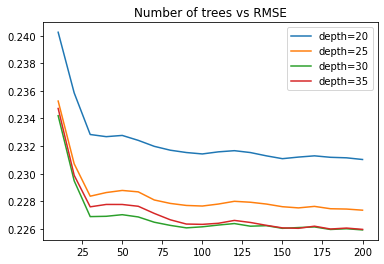

In [79]:
num_trees = list(range(10, 201, 10))
plt.plot(num_trees, all_rmses[20], label = 'depth=20')
plt.plot(num_trees, all_rmses[25], label = 'depth=25')
plt.plot(num_trees, all_rmses[30], label = 'depth=30')
plt.plot(num_trees, all_rmses[35], label = 'depth=35')
plt.legend()
plt.title('Number of trees vs RMSE')
plt.show()

In [80]:
all_rmses = {}

for m in [1, 2, 3, 5]:
    print(f'min_samples_leaf: {m}')
    rmses = []
    
    for i in range(10, 201, 20):
        rf = RandomForestRegressor(n_estimators=i, max_depth=30, min_samples_leaf=m, random_state=31)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        rmses.append(rmse)
        print(f'i: {i:>6}, rmse: {rmse:.5f}')
        
    all_rmses[m] = rmses
    print()
    

min_samples_leaf: 1
i:     10, rmse: 0.23420
i:     30, rmse: 0.22689
i:     50, rmse: 0.22703
i:     70, rmse: 0.22648
i:     90, rmse: 0.22607
i:    110, rmse: 0.22628
i:    130, rmse: 0.22619
i:    150, rmse: 0.22604
i:    170, rmse: 0.22614
i:    190, rmse: 0.22601

min_samples_leaf: 2
i:     10, rmse: 0.23739
i:     30, rmse: 0.22985
i:     50, rmse: 0.22907
i:     70, rmse: 0.22916
i:     90, rmse: 0.22894
i:    110, rmse: 0.22908
i:    130, rmse: 0.22935
i:    150, rmse: 0.22906
i:    170, rmse: 0.22928
i:    190, rmse: 0.22915

min_samples_leaf: 3
i:     10, rmse: 0.24170
i:     30, rmse: 0.23620
i:     50, rmse: 0.23521
i:     70, rmse: 0.23533
i:     90, rmse: 0.23516
i:    110, rmse: 0.23496
i:    130, rmse: 0.23495
i:    150, rmse: 0.23465
i:    170, rmse: 0.23473
i:    190, rmse: 0.23469

min_samples_leaf: 5
i:     10, rmse: 0.25175
i:     30, rmse: 0.24652
i:     50, rmse: 0.24610
i:     70, rmse: 0.24579
i:     90, rmse: 0.24575
i:    110, rmse: 0.24568
i:    130, rmse: 

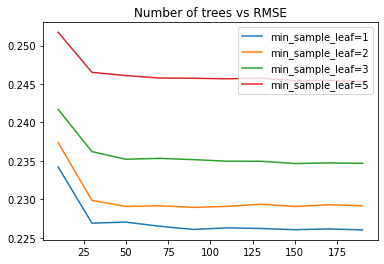

In [81]:
num_trees = list(range(10, 201, 20))
plt.plot(num_trees, all_rmses[1], label = 'min_sample_leaf=1')
plt.plot(num_trees, all_rmses[2], label = 'min_sample_leaf=2')
plt.plot(num_trees, all_rmses[3], label = 'min_sample_leaf=3')
plt.plot(num_trees, all_rmses[5], label = 'min_sample_leaf=5')
plt.legend()
plt.title('Number of trees vs RMSE')
plt.show()

In [82]:
rf = RandomForestRegressor(n_estimators=150, max_depth=30, min_samples_leaf=1, random_state=31)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print(f'val rmse:{mean_squared_error(y_val, y_pred, squared=False):.5f}')

val rmse:0.22604


## Training the finale model

In [83]:
rf = RandomForestRegressor(n_estimators=150, max_depth=30, min_samples_leaf=1, random_state=31)
rf.fit(X_full_train, y_full_train)

RandomForestRegressor(max_depth=30, n_estimators=150, random_state=31)

In [84]:
y_pred = rf.predict(X_test)
print(f'test rmse:{mean_squared_error(y_test, y_pred, squared=False):.5f}')

test rmse:0.21832


In [85]:
df_test.iloc[10]

house_type        planta_8
house_type_2      exterior
rooms                    1
m2                    62.0
elevator               yes
garage                 yes
neighborhood       legazpi
district        arganzuela
Name: 10, dtype: object

In [86]:
np.expm1(rf.predict(dv.transform(df_test.iloc[10].to_dict()))[0])

371155.0476089779

In [87]:
np.expm1(y_test.iloc[10])

359900.0000000002